In [3]:
import tweepy
 
# Add Twitter API key and secret #Lo sé están visibles, confío en usted:)
consumer_key = "ltBc0wyZ7qKck2oO9WEjocDjV"
consumer_secret = "0Y2CDt7lprA3iiUjdUARwnUm07I7vPPjvD8XdhAW4RSSNyx3hE"

# Handling authentication with Twitter
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
 
# Create a wrapper for the Twitter API
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


In [4]:
!pip install -q transformers

     |████████████████████████████████| 5.5 MB 4.9 MB/s 
     |████████████████████████████████| 7.6 MB 38.4 MB/s 
     |████████████████████████████████| 182 kB 56.9 MB/s 


In [5]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [6]:
data = ["I love you", "I hate you"]
sentiment_pipeline(data)

[{'label': 'POSITIVE', 'score': 0.9998656511306763},
 {'label': 'NEGATIVE', 'score': 0.9991129040718079}]

In [7]:
specific_model = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")
specific_model(data)


Downloading:   0%|          | 0.00/890 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/540M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/295 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/843k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


[{'label': 'POS', 'score': 0.9903131723403931},
 {'label': 'NEG', 'score': 0.9797351360321045}]

In [8]:
specific_model = pipeline(model="finiteautomata/beto-sentiment-analysis")
data = ["El equipo del Millonarios apesta", "Estoy contento de jugar"]
specific_model(data)

Downloading:   0%|          | 0.00/841 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/528 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/242k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

[{'label': 'NEG', 'score': 0.9992181062698364},
 {'label': 'POS', 'score': 0.9983267188072205}]

In [9]:
!pip install -q transformers tweepy wordcloud matplotlib


In [10]:
# Helper function for handling pagination in our search and handle rate limits
def limit_handled(cursor):
   while True:
       try:
           yield cursor.next()
       except tweepy.RateLimitError:
           print('Reached rate limite. Sleeping for >15 minutes')
           time.sleep(15 * 61)
       except StopIteration:
           break
 
# Define the term you will be using for searching tweets
query = '"Mundial de Qatar" OR "Mundial" OR "2022"  -filter:retweets'
query = query + ' -filter:retweets'
 
# Define how many tweets to get from the Twitter API
count = 1000
 
# Let's search for tweets using Tweepy
search = limit_handled(tweepy.Cursor(api.search,
                       q=query,
                       tweet_mode='extended',
                       lang='es',
                       result_type="recent").items(count))


In [11]:
from transformers import pipeline
 
# Set up the inference pipeline using a model from the 🤗 Hub
sentiment_analysis = pipeline(model="finiteautomata/beto-sentiment-analysis")
 
# Let's run the sentiment analysis on each tweet
tweets = []
for tweet in search:
   try:
     content = tweet.full_text
     sentiment = sentiment_analysis(content)
     tweets.append({'tweet': content, 'sentiment': sentiment[0]['label']})
 
   except:
     pass


Downloading:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

In [12]:
import pandas as pd
 
# Load the data in a dataframe
df = pd.DataFrame(tweets)
pd.set_option('display.max_colwidth', None)


In [13]:
# Show a tweet for each sentiment
display(df[df["sentiment"] == 'POS'].head(1))
display(df[df["sentiment"] == 'NEU'].head(1))
display(df[df["sentiment"] == 'NEG'].head(1))

,tweet,sentiment
0,"@AlertaNews24 Se perfila como el pero mundial de la historia ya con lo que pasó hoy con la transmisión en vivo que va ,",POS


,tweet,sentiment
2,"Vuelve Naviluz. Horario, recorrido y compra de entradas https://t.co/04MPGis7FY",NEU


,tweet,sentiment
1,Tan solo de imaginarme que hubiera pasado si las pinks fueran nominadas y ganaran\nTercera guerra mundial mi genteeee https://t.co/750T0NWwox,NEG


sentiment
NEG    247
NEU    522
POS    231
dtype: int64


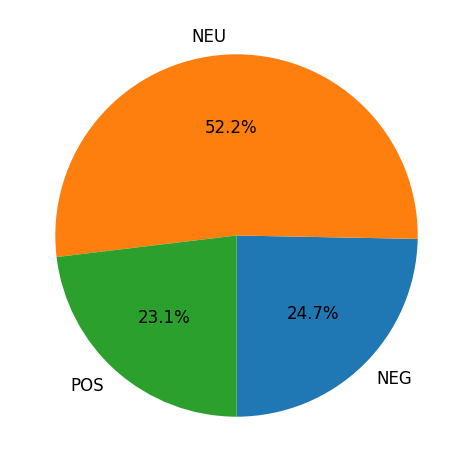

In [14]:
import matplotlib.pyplot as plt
# Let's count the number of tweets by sentiments
sentiment_counts = df.groupby(['sentiment']).size()
print(sentiment_counts)

# Let's visualize the sentiments
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")


In [15]:
import nltk
from nltk.corpus import stopwords

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
stop_words_sp = set(stopwords.words('spanish'))

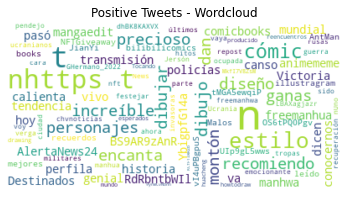

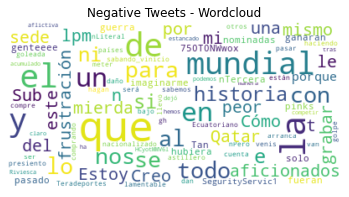

In [18]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
 
# Wordcloud with positive tweets
positive_tweets = df['tweet'][df["sentiment"] == 'POS']
stop_words = ["https", "co", "RT", "NoticiaW"] + list(stop_words_sp)
positive_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
 
# Wordcloud with negative tweets
negative_tweets = df['tweet'][df["sentiment"] == 'NEG']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
